**_Analisi del Cammino - FESI 2021/22_**
============================================================
### **_Comparazione Grafica e Numerica tra un soggetto Sano e Malato_**
Macera Emanuele 4678368

- **Introduzione:** <br> L'obiettivo principale di questo progetto è analizzare le differenze tra soggetti sani e malati attraverso l'analisi di dati numerici e grafici. <br> Per concentrarmi su una visione più dettagliata, ho deciso di utilizzare esclusivamente i dati delle matrici dei pazienti in cui erano state campionate entrambe le gambe. <br> Come primo passo, ho sviluppato un grafico del movimento delle gambe per ottenere una rappresentazione visuale chiara dei dati che avrei manipolato e dell'evoluzione nel tempo del paziente. <br> Successivamente, ho creato grafici per ciascun arto (gamba destra e poi sinistra) per analizzare le variazioni delle coordinate X e Y, calcolando accelerazioni e velocità tra i soggetti. <br> Infine, ho organizzato i dati rilevanti in tabelle per effettuare un confronto finale tra i gruppi di pazienti.

- **Obiettivi:** <br> Un obiettivo che mi sono posto era la creazione di un codice modulare e riutilizzabile per analizzare dati provenienti da diversi pazienti in modo efficiente. <br> Inoltre, il progetto si proponeva di confrontare le velocità, le accelerazioni e i pattern di deambulazione tra i pazienti sani e quelli malati, con l'obiettivo di identificare differenze significative e trarre conclusioni sulla condizione dei soggetti analizzati.

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from numpy import diff
from scipy.interpolate import interp1d
from IPython.display import clear_output

- **Funzione _Scelta del paziente_**: "Riutilizzo del codice".


In [2]:
from scipy.io import loadmat

# Dizionario per mappare i pazienti alle loro rispettive matrici
patients_dx = {
    1: "S001_dx",
    2: "S002_dx",
    3: "S004_dx",
    4: "S005_dx",
    5: "S009_dx",
    6: "S_211_01_R",
    7: "S_241_01_R",
    8: "S_241_02_R",
    9: "S_522_01_R"
}

patients_sx = {
    1: "S001_sx",
    2: "S002_sx",
    3: "S004_sx",
    4: "S005_sx",
    5: "S009_sx",
    6: "S_211_01_L",
    7: "S_241_01_L",
    8: "S_241_02_L",
    9: "S_522_01_L"
}

def get_patient_data(patient_number, patients_dict):
    """
    Ottieni i dati del paziente specificato dal numero e dal dizionario dei pazienti.
    """
    try:
        patient = patients_dict.get(patient_number)
        if not patient:
            raise KeyError("Oops! Paziente non trovato.")
        
        path = rf"C:\Users\emanu\Desktop\Gait\{patient}.mat"
        data = loadmat(path)
        return data[patient]
    
    except FileNotFoundError:
        print("File non trovato.")
    except KeyError as e:
        print(e)

# Scelta del paziente
print('Seleziona test: da 1 a 5 test sano, da 6 a 9 test malato...')
patient_number = int(input())

# Ottieni dati per la gamba dx e sx
data_filter_dx = get_patient_data(patient_number, patients_dx)
data_filter_sx = get_patient_data(patient_number, patients_sx)

# Controllo se i dati sono stati caricati correttamente
if data_filter_dx is not None and data_filter_sx is not None:
    print("Dati importati correttamente per DX e SX.")

Seleziona test: da 1 a 5 test sano, da 6 a 9 test malato..
S001_dx
S001_sx
...Dati importati correttamente


- **Varie funzioni implementate**: <br>

In [3]:
import numpy as np
from scipy.signal import butter, lfilter

### Ottiene la dimensione massima delle X o delle Y nella nostra matrice ###

def max_step(start, dim, data):
    max_val = 0
    for idx in range(start, dim, 2):
        max_val = max(max_val, np.nanmax(data[:, idx]))
    return max_val

### Impostazioni generali per il grafico della camminata ###

def grafico(X, Y):
    plt.title('2D Walk', fontsize=18)
    plt.xlabel('Value X')
    plt.ylabel('Value Y')
    ax = plt.gca()
    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_aspect(1)

### Indice velocità o accelerazione massime ###

def idx_max(time, max_vals):
    max_idx = np.argmax(max_vals)
    return max_idx

### Filtro Passa-Basso ###

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

- **Dimensioni utili per i grafici**: <br>

In [4]:
### Ottengo la lunghezza dei frame ###

maxDx_T = len(data_filter_Dx)
maxSx_T = len(data_filter_Sx)   

### Ottengo la dimensione più grande delle X e delle Y (Gamba Dx) ###

maxDx_X = max_step(0, data_filter_Dx.shape[1], data_filter_Dx)
maxDx_Y = max_step(1, data_filter_Dx.shape[1], data_filter_Dx)

print("Val Max Dx (X):", maxDx_X)
print("Val Max Dx (Y):", maxDx_Y)

### Ottengo la dimensione più grande delle X e delle Y (Gamba Sx) ###

maxSx_X = max_step(0, data_filter_Sx.shape[1], data_filter_Sx)
maxSx_Y = max_step(1, data_filter_Sx.shape[1], data_filter_Sx)

print("Val Max Sx (X):", maxSx_X)
print("Val Max Sx (Y):", maxSx_Y)

Val Max Dx (X): 1912.092919712979
Val Max Dx (Y): 1023.9174598988925
Val Max Sx (X): 1859.946644238329
Val Max Sx (Y): 1020.8693481310389


- **Simulazione di camminata:** <br> I prossimi due grafici rappresentano una simulazione del movimento delle gambe, unendo i punti degli arti. <br> Il primo grafico rappresenta il movimento della gamba destra (direzione da sinistra a destra), mentre il secondo grafico mostra sia la gamba destra che la gamba sinistra del paziente. <br><br> È importante notare che il secondo grafico non potrà mai essere realistico poiché unisce, nella stessa direzione, due gambe che sono state registrate in momenti separati (una originariamente diretta verso destra, mentre l'altra verso sinistra).

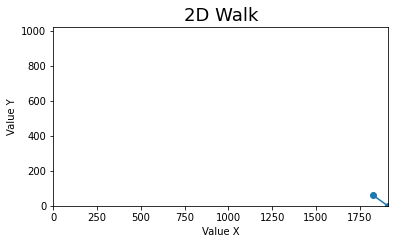

In [5]:
# Ciclo che sovrascrive il grafico a ogni iterazione
for time in range(len(data_filter_Dx)):
    
    grafico(maxDx_X, maxDx_Y)
    
    # Punti per la gamba Dx
    points_dx = [
        [data_filter_Dx[time, 0], data_filter_Dx[time, 2], data_filter_Dx[time, 4], data_filter_Dx[time, 6]],
        [-data_filter_Dx[time, 1] + maxDx_Y, -data_filter_Dx[time, 3] + maxDx_Y, -data_filter_Dx[time, 5] + maxDx_Y, -data_filter_Dx[time, 7] + maxDx_Y]
    ]
    
    # Creazione linee per la gamba Dx
    plt.plot(points_dx[0], points_dx[1], linestyle="solid", marker="o", label="Gamba Dx")
    
    plt.draw()
    plt.pause(0.01)
    plt.clf()  # Pulizia del plot per il prossimo ciclo

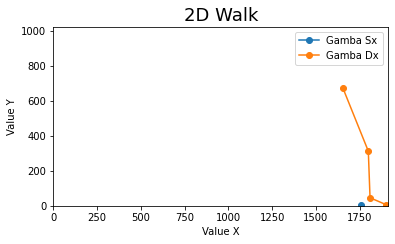

In [6]:
# Trovo i dati comuni utili

min_T = min(maxDx_T, maxSx_T)  # Frame massimo più piccolo per evitare "list index out of range"
max_Y = max(maxDx_Y, maxSx_Y)  # Range Y maggiore
max_X = max(maxDx_X, maxSx_X)  # Range X maggiore

# Ciclo che sovrascrive il grafico a ogni iterazione

for time in range(min_T):
    
    grafico(max_X, max_Y)
    
    # Punti per la gamba Sx
    points_sx = [
        [-data_filter_Sx[time, 0] + maxDx_X, -data_filter_Sx[time, 2] + maxDx_X, -data_filter_Sx[time, 4] + maxDx_X, -data_filter_Sx[time, 6] + maxDx_X],
        [-data_filter_Sx[time, 1] + maxSx_Y, -data_filter_Sx[time, 3] + maxSx_Y, -data_filter_Sx[time, 5] + maxSx_Y, -data_filter_Sx[time, 7] + maxSx_Y]
    ]
    
    # Punti per la gamba Dx
    points_dx = [
        [data_filter_Dx[time, 0], data_filter_Dx[time, 2], data_filter_Dx[time, 4], data_filter_Dx[time, 6]],
        [-data_filter_Dx[time, 1] + maxDx_Y, -data_filter_Dx[time, 3] + maxDx_Y, -data_filter_Dx[time, 5] + maxDx_Y, -data_filter_Dx[time, 7] + maxDx_Y]
    ]
    
    # Creazione linee per la gamba Sx
    plt.plot(points_sx[0], points_sx[1], linestyle="solid", marker="o", label="Gamba Sx")
    
    # Creazione linee per la gamba Dx
    plt.plot(points_dx[0], points_dx[1], linestyle="solid", marker="o", label="Gamba Dx")
    
    plt.draw()
    plt.legend()
    plt.pause(0.01)
    plt.clf()  # Pulizia del plot per il prossimo ciclo

- **Creazione dei _grafici_**: <br> Ho preferito manipolare i dati facendo l'interpolazione e non rimuovendo i NaN siccome, a mio parere, avrei alterato i risultati.

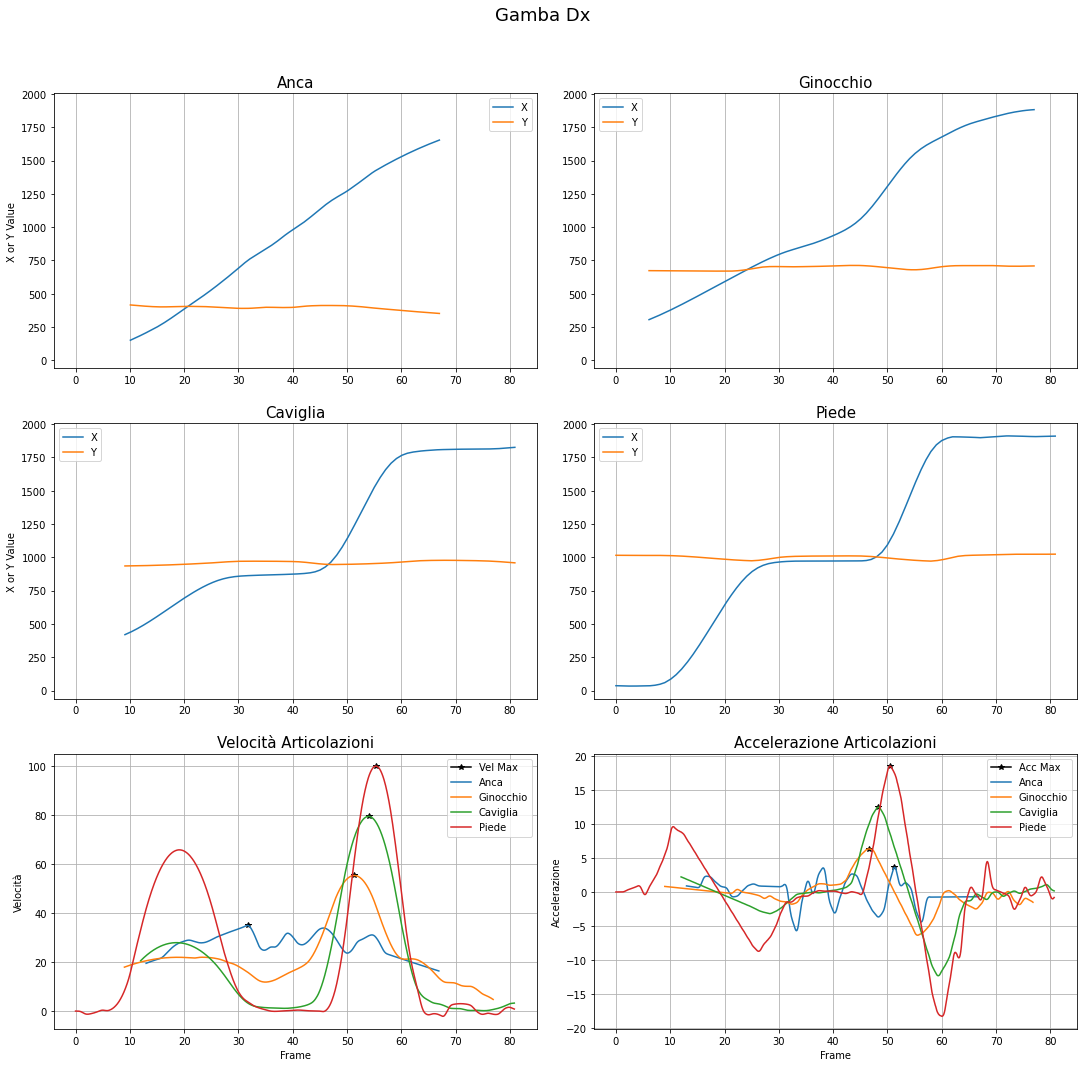

In [7]:
# Interpolazione dei dati

tempo = np.arange(0, len(data_filter_Dx))       # Lunghezza array, ottengo il numero di frame        
new_tempoDx = np.arange(0, len(data_filter_Dx), 0.1)

def interpolate_data(data, new_time):
    interpolator = interp1d(tempo, data, fill_value="extrapolate")
    return interpolator(new_time)

interp_xAncaDx = interpolate_data(data_filter_Dx[:, 0], new_tempoDx)
interp_yAncaDx = interpolate_data(data_filter_Dx[:, 1], new_tempoDx)
interp_xGinoDx = interpolate_data(data_filter_Dx[:, 2], new_tempoDx)
interp_yGinoDx = interpolate_data(data_filter_Dx[:, 3], new_tempoDx)
interp_xCaviDx = interpolate_data(data_filter_Dx[:, 4], new_tempoDx)
interp_yCaviDx = interpolate_data(data_filter_Dx[:, 5], new_tempoDx)
interp_xPiedDx = interpolate_data(data_filter_Dx[:, 6], new_tempoDx)
interp_yPiedDx = interpolate_data(data_filter_Dx[:, 7], new_tempoDx)

# Calcolo velocità

def calculate_velocity(data, time):
    velocity = diff(data) / diff(time)
    velocity = np.append(velocity, np.nan)  # Aggiungi NaN finale per mantenere la dimensione
    return velocity

velAncaDx = calculate_velocity(interp_xAncaDx, new_tempoDx)
velGinoDx = calculate_velocity(interp_xGinoDx, new_tempoDx)
velCaviDx = calculate_velocity(interp_xCaviDx, new_tempoDx)
velPiedDx = calculate_velocity(interp_xPiedDx, new_tempoDx)

# Calcolo accelerazione

def calculate_acceleration(velocity, time):
    acceleration = calculate_velocity(velocity, time)
    return acceleration

accAncaDx = calculate_acceleration(velAncaDx, new_tempoDx)
accGinoDx = calculate_acceleration(velGinoDx, new_tempoDx)
accCaviDx = calculate_acceleration(velCaviDx, new_tempoDx)
accPiedDx = calculate_acceleration(velPiedDx, new_tempoDx)

### Filtri  ###

def apply_filter(data, N, Fc, Fs):
    h = scipy.signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs/2)
    filtered_data = scipy.signal.lfilter(h, 1.0, data)
    return filtered_data

N = 30    # Lunghezza del filtro
Fs = 25.0  # Frequenza di campionamento
Fc = 1.0   # Frequenza di taglio scelta

velAncaDx = apply_filter(velAncaDx, N, Fc, Fs)
velGinoDx = apply_filter(velGinoDx, N, Fc, Fs)
velCaviDx = apply_filter(velCaviDx, N, Fc, Fs)
velPiedDx = apply_filter(velPiedDx, N, Fc, Fs)

accAncaDx = apply_filter(accAncaDx, N, Fc, Fs)
accGinoDx = apply_filter(accGinoDx, N, Fc, Fs)
accCaviDx = apply_filter(accCaviDx, N, Fc, Fs)
accPiedDx = apply_filter(accPiedDx, N, Fc, Fs)

# Indici velocità e accelerazione massima

def find_max_index(data):
    max_index = np.argmax(data)
    return max_index

idxVelAncaDx = find_max_index(velAncaDx)
idxVelGinoDx = find_max_index(velGinoDx)
idxVelCaviDx = find_max_index(velCaviDx)
idxVelPiedDx = find_max_index(velPiedDx)
idxAccAncaDx = find_max_index(accAncaDx)
idxAccGinoDx = find_max_index(accGinoDx)
idxAccCaviDx = find_max_index(accCaviDx)
idxAccPiedDx = find_max_index(accPiedDx)

# Dimensione grafici e creazione dei subplot

fig, ax = plt.subplots(figsize=(15, 15))

ax1 = plt.subplot(3, 2, 1)
ax1.set_title("Anca", fontsize=15)
ax1.set_ylabel("X or Y Value")

ax2 = plt.subplot(3, 2, 2, sharex=ax1, sharey=ax1)
ax2.set_title("Ginocchio", fontsize=15)

ax3 = plt.subplot(3, 2, 3,  sharex=ax1, sharey=ax1)
ax3.set_title('Caviglia', fontsize=15)
ax3.set_ylabel("X or Y Value")

ax4 = plt.subplot(3, 2, 4,  sharex=ax1, sharey=ax1)
ax4.set_title('Piede', fontsize=15)

ax5 = plt.subplot(3, 2, 5,  sharex=ax1)
ax5.set_title('Velocità Articolazioni', fontsize=15)
ax5.set_ylabel("Velocità")
ax5.set_xlabel("Frame")

ax6 = plt.subplot(3, 2, 6, sharex=ax1)
ax6.set_title('Accelerazione Articolazioni', fontsize=15)
ax6.set_ylabel("Accelerazione")
ax6.set_xlabel("Frame")

### Posizione X e Y nei frame ###

ax1.plot(new_tempoDx, interp_xAncaDx, label="X")
ax1.plot(new_tempoDx, interp_yAncaDx, label="Y")
ax2.plot(new_tempoDx, interp_xGinoDx, label="X")
ax2.plot(new_tempoDx, interp_yGinoDx, label="Y")
ax3.plot(new_tempoDx, interp_xCaviDx, label="X")
ax3.plot(new_tempoDx, interp_yCaviDx, label="Y")
ax4.plot(new_tempoDx, interp_xPiedDx, label="X")
ax4.plot(new_tempoDx, interp_yPiedDx, label="Y")

### Grafici velocità e accelerazione con punti massimi ###

ax5.plot(new_tempoDx[idxVelAncaDx], np.nanmax(velAncaDx), marker='*', label="Vel Max", color='k')
ax5.plot(new_tempoDx, velAncaDx, label="Anca")
ax5.plot(new_tempoDx[idxVelGinoDx], np.nanmax(velGinoDx), marker='*', color='k')
ax5.plot(new_tempoDx, velGinoDx, label="Ginocchio")
ax5.plot(new_tempoDx[idxVelCaviDx], np.nanmax(velCaviDx), marker='*', color='k')
ax5.plot(new_tempoDx, velCaviDx, label="Caviglia")
ax5.plot(new_tempoDx[idxVelPiedDx], np.nanmax(velPiedDx), marker='*', color='k')
ax5.plot(new_tempoDx, velPiedDx, label="Piede")

ax6.plot(new_tempoDx[idxAccAncaDx], np.nanmax(accAncaDx), marker='*', label="Acc Max", color='k')
ax6.plot(new_tempoDx, accAncaDx, label="Anca")
ax6.plot(new_tempoDx[idxAccGinoDx], np.nanmax(accGinoDx), marker='*', color='k')
ax6.plot(new_tempoDx, accGinoDx, label="Ginocchio")
ax6.plot(new_tempoDx[idxAccCaviDx], np.nanmax(accCaviDx), marker='*', color='k')
ax6.plot(new_tempoDx, accCaviDx, label="Caviglia")
ax6.plot(new_tempoDx[idxAccPiedDx], np.nanmax(accPiedDx), marker='*', color='k')
ax6.plot(new_tempoDx, accPiedDx, label="Piede")

# Mostra linee asse X/Y
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.xaxis.grid()
ax5.grid()
ax6.grid()

# Mostra legende
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

# Titolo
plt.suptitle("Gamba Dx\n\n\n", fontsize=18)

# Layout
plt.tight_layout(pad=0.5, w_pad=1.5, h_pad=2.0)

# Mostra il grafico
plt.show()

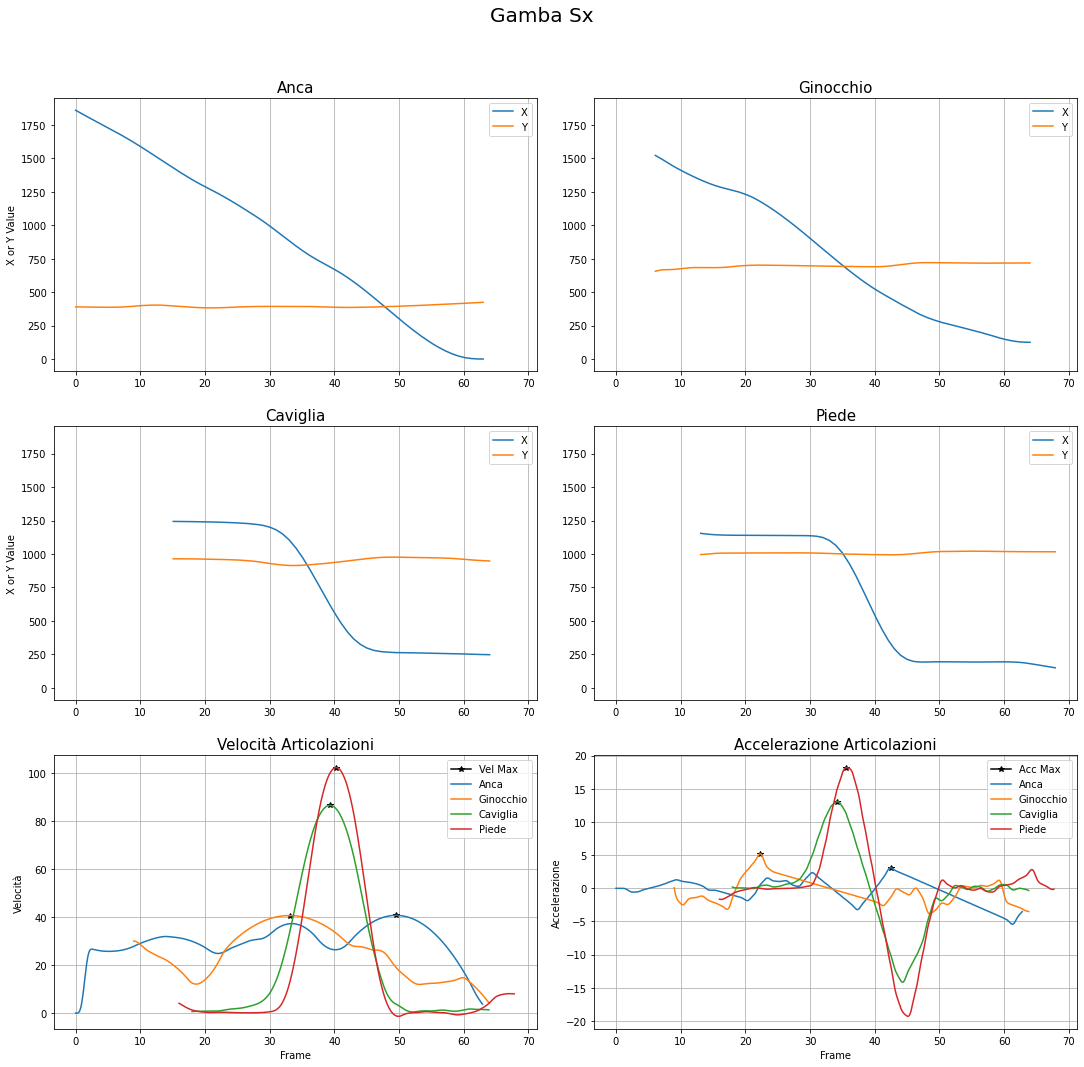

In [8]:
# Interpolazione dei dati della matrice

tempo = np.arange(0, len(data_filter_Sx))
new_tempoSx = np.arange(0, len(data_filter_Sx), 0.1)

def interpolate_data(data, new_time):
    interpolator = interp1d(tempo, data, fill_value="extrapolate")
    return interpolator(new_time)

interp_xAncaSx = interpolate_data(data_filter_Sx[:, 0], new_tempoSx)
interp_yAncaSx = interpolate_data(data_filter_Sx[:, 1], new_tempoSx)
interp_xGinoSx = interpolate_data(data_filter_Sx[:, 2], new_tempoSx)
interp_yGinoSx = interpolate_data(data_filter_Sx[:, 3], new_tempoSx)
interp_xCaviSx = interpolate_data(data_filter_Sx[:, 4], new_tempoSx)
interp_yCaviSx = interpolate_data(data_filter_Sx[:, 5], new_tempoSx)
interp_xPiedSx = interpolate_data(data_filter_Sx[:, 6], new_tempoSx)
interp_yPiedSx = interpolate_data(data_filter_Sx[:, 7], new_tempoSx)

# Calcolo velocità

def calculate_velocity(data, time):
    velocity = diff(data) / diff(time)
    velocity = np.append(velocity, np.nan)  # Aggiungi NaN finale per mantenere la dimensione
    return velocity

velAncaSx = calculate_velocity(interp_xAncaSx, new_tempoSx)
velGinoSx = calculate_velocity(interp_xGinoSx, new_tempoSx)
velCaviSx = calculate_velocity(interp_xCaviSx, new_tempoSx)
velPiedSx = calculate_velocity(interp_xPiedSx, new_tempoSx)

# Calcolo accelerazione

def calculate_acceleration(velocity, time):
    acceleration = calculate_velocity(velocity, time)
    return acceleration

accAncaSx = calculate_acceleration(velAncaSx, new_tempoSx)
accGinoSx = calculate_acceleration(velGinoSx, new_tempoSx)
accCaviSx = calculate_acceleration(velCaviSx, new_tempoSx)
accPiedSx = calculate_acceleration(velPiedSx, new_tempoSx)

### Filtri ###

def apply_filter(data, N, Fc, Fs):
    h = scipy.signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs/2)
    filtered_data = scipy.signal.lfilter(h, 1.0, data)
    return filtered_data

N = 30    # Lunghezza del filtro
Fs = 25.0  # Frequenza di campionamento
Fc = 1.0   # Frequenza di taglio scelta

velAncaSx = apply_filter(velAncaSx, N, Fc, Fs)
velGinoSx = apply_filter(velGinoSx, N, Fc, Fs)
velCaviSx = apply_filter(velCaviSx, N, Fc, Fs)
velPiedSx = apply_filter(velPiedSx, N, Fc, Fs)

accAncaSx = apply_filter(accAncaSx, N, Fc, Fs)
accGinoSx = apply_filter(accGinoSx, N, Fc, Fs)
accCaviSx = apply_filter(accCaviSx, N, Fc, Fs)
accPiedSx = apply_filter(accPiedSx, N, Fc, Fs)

### Indici velocità e accelerazione massima ###

def find_max_index(data):
    max_index = np.argmax(data)
    return max_index

idxVelAncaSx = find_max_index(-velAncaSx)
idxVelGinoSx = find_max_index(-velGinoSx)
idxVelCaviSx = find_max_index(-velCaviSx)
idxVelPiedSx = find_max_index(-velPiedSx)
idxAccAncaSx = find_max_index(-accAncaSx)
idxAccGinoSx = find_max_index(-accGinoSx)
idxAccCaviSx = find_max_index(-accCaviSx)
idxAccPiedSx = find_max_index(-accPiedSx)

# Dimensione grafici e creazione dei subplot

fig, ax = plt.subplots(figsize=(15, 15))

ax1 = plt.subplot(3, 2, 1)
ax1.set_title("Anca", fontsize=15)
ax1.set_ylabel("X or Y Value")

ax2 = plt.subplot(3, 2, 2, sharex=ax1, sharey=ax1)
ax2.set_title("Ginocchio", fontsize=15)

ax3 = plt.subplot(3, 2, 3, sharex=ax1, sharey=ax1)
ax3.set_title('Caviglia', fontsize=15)
ax3.set_ylabel("X or Y Value")

ax4 = plt.subplot(3, 2, 4, sharex=ax1, sharey=ax1)
ax4.set_title('Piede', fontsize=15)

ax5 = plt.subplot(3, 2, 5, sharex=ax1)
ax5.set_title('Velocità Articolazioni', fontsize=15)
ax5.set_ylabel("Velocità")
ax5.set_xlabel("Frame")

ax6 = plt.subplot(3, 2, 6, sharex=ax1)
ax6.set_title('Accelerazione Articolazioni', fontsize=15)
ax6.set_ylabel("Accelerazione")
ax6.set_xlabel("Frame")

### Posizione X e Y nei frame ###

ax1.plot(new_tempoSx, interp_xAncaSx, label="X")
ax1.plot(new_tempoSx, interp_yAncaSx, label="Y")
ax2.plot(new_tempoSx, interp_xGinoSx, label="X")
ax2.plot(new_tempoSx, interp_yGinoSx, label="Y")
ax3.plot(new_tempoSx, interp_xCaviSx, label="X")
ax3.plot(new_tempoSx, interp_yCaviSx, label="Y")
ax4.plot(new_tempoSx, interp_xPiedSx, label="X")
ax4.plot(new_tempoSx, interp_yPiedSx, label="Y")

### Grafici velocità e accelerazione con punti massimi ###

ax5.plot(new_tempoSx[idxVelAncaSx], np.nanmax(-velAncaSx), marker='*', label="Vel Max", color='k')
ax5.plot(new_tempoSx, -velAncaSx, label="Anca")
ax5.plot(new_tempoSx[idxVelGinoSx], np.nanmax(-velGinoSx), marker='*', color='k')
ax5.plot(new_tempoSx, -velGinoSx, label="Ginocchio")
ax5.plot(new_tempoSx[idxVelCaviSx], np.nanmax(-velCaviSx), marker='*', color='k')
ax5.plot(new_tempoSx, -velCaviSx, label="Caviglia")
ax5.plot(new_tempoSx[idxVelPiedSx], np.nanmax(-velPiedSx), marker='*', color='k')
ax5.plot(new_tempoSx, -velPiedSx, label="Piede")

ax6.plot(new_tempoSx[idxAccAncaSx], np.nanmax(-accAncaSx), marker='*', label="Acc Max", color='k')
ax6.plot(new_tempoSx, -accAncaSx, label="Anca")
ax6.plot(new_tempoSx[idxAccGinoSx], np.nanmax(-accGinoSx), marker='*', color='k')
ax6.plot(new_tempoSx, -accGinoSx, label="Ginocchio")
ax6.plot(new_tempoSx[idxAccCaviSx], np.nanmax(-accCaviSx), marker='*', color='k')
ax6.plot(new_tempoSx, -accCaviSx, label="Caviglia")
ax6.plot(new_tempoSx[idxAccPiedSx], np.nanmax(-accPiedSx), marker='*', color='k')
ax6.plot(new_tempoSx, -accPiedSx, label="Piede")

# Mostra linee asse X/Y
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.xaxis.grid()
ax5.grid()
ax6.grid()

# Mostra legende
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

# Titolo
plt.suptitle("Gamba Sx\n\n\n", fontsize=20)

# Layout
plt.tight_layout(pad=0.5, w_pad=1.5, h_pad=2.0)

# Mostra il grafico
plt.show()

- **Analisi dei Dati:** In questa sezione, si procederà con l'analisi dei dati relativi al paziente. Sarà possibile effettuare un confronto tra le velocità e le accelerazioni da destro a sinistro e da sinistro a destro di ciascun arto, nonché dell'intera parte inferiore del corpo.<br>Si forniranno inoltre gli indici in cui il paziente raggiunge la velocità o l'accelerazione massima. Questi indicatori risultano utili per comprenderne a quale fase del ciclo del passo ci si trova, fornendo così una maggiore comprensione dell'andamento dei movimenti articolari durante il cammino.


In [9]:
print("DATI UTILI SULLA VELOCITÀ (Paziente n.", patient_number, ")")

### Velocità media ###
print("\nVelocità media:")
table = [
    ["Arto", "Vel med Dx (Px/s)", "Vel med Sx (Px/s)"],
    ["Anca", round(np.nanmean(velAncaDx), 2), round(np.nanmean(-velAncaSx), 2)],
    ["Ginocchio", round(np.nanmean(velGinoDx), 2), round(np.nanmean(-velGinoSx), 2)],
    ["Caviglia", round(np.nanmean(velCaviDx), 2), round(np.nanmean(-velCaviSx), 2)],
    ["Piede", round(np.nanmean(velPiedDx), 2), round(np.nanmean(-velPiedSx), 2)]
]
print(tabulate(table))
mediaMedVelDx = np.nanmean([velAncaDx, velGinoDx, velCaviDx, velPiedDx])
mediaMedVelSx = np.nanmean([-velAncaSx, -velGinoSx, -velCaviSx, -velPiedSx])
print("- media vel med gamba Dx:", round(mediaMedVelDx, 2), "px/s")
print("- media vel med gamba Sx:", round(mediaMedVelSx, 2), "px/s")
print("- media vel med:", round((mediaMedVelSx + mediaMedVelDx) / 2, 2), "± D.S.", round(np.std([mediaMedVelSx, mediaMedVelDx]), 2), "px/s")

### Velocità massima ###
print("\nVelocità massima:")
table = [
    ["Arto", "Vel max Dx (Px/s)", "Vel max Sx (Px/s)", "Numero Frame Dx", "Numero Frame Sx"],
    ["Anca", int(np.nanmax(velAncaDx)), int(np.nanmax(-velAncaSx)), int(new_tempoSx[idxVelAncaDx]), int(new_tempoSx[idxVelAncaSx])],
    ["Ginocchio", int(np.nanmax(velGinoDx)), int(np.nanmax(-velGinoSx)), int(new_tempoSx[idxVelGinoDx]), int(new_tempoSx[idxVelGinoSx])],
    ["Caviglia", int(np.nanmax(velCaviDx)), int(np.nanmax(-velCaviSx)), int(new_tempoSx[idxVelCaviDx]), int(new_tempoSx[idxVelCaviSx])],
    ["Piede", int(np.nanmax(velPiedDx)), int(np.nanmax(-velPiedSx)), int(new_tempoSx[idxVelPiedDx]), int(new_tempoSx[idxVelPiedSx])]
]
print(tabulate(table))
mediaMaxVelDx = np.nanmean([np.nanmax(velAncaDx), np.nanmax(velGinoDx), np.nanmax(velCaviDx), np.nanmax(velPiedDx)])
mediaMaxVelSx = np.nanmean([-np.nanmax(velAncaSx), -np.nanmax(velGinoSx), -np.nanmax(velCaviSx), -np.nanmax(velPiedSx)])
print("- media vel max gamba Dx:", round(mediaMaxVelDx, 2), "px/s")
print("- media vel max gamba Sx:", round(mediaMaxVelSx, 2), "px/s")
print("- media vel max:", round((mediaMaxVelSx + mediaMaxVelDx) / 2, 2), "± D.S.", round(np.std([mediaMaxVelSx, mediaMaxVelDx]), 2), "px/s")

print("\nTempo di percorrenza:")
table = [
    ["", "Dx", "Sx", "Media tot"],
    ["Frame", len(data_filter_Dx), len(data_filter_Sx), round((len(data_filter_Dx) + len(data_filter_Sx)) / 2, 2)]
]
print(tabulate(table, headers="firstrow"))


DATI UTILI SULLA VELOCITÀ ( Paziente n. 1 )

Velocità media:
---------  -----------------  -----------------
Arto       Vel med Dx (Px/s)  Vel med Sx (Px/s)
Anca       26.9               29.48
Ginocchio  22.74              24.59
Caviglia   19.94              21.61
Piede      23.15              18.99
---------  -----------------  -----------------
- media vel med gamba Dx: 23.18 px/s
- media vel med gamba Sx: 23.67 px/s
- media vel med: 23.43 ± D.S. 0.24 px/s

Velocità massima:
---------  -----------------  -----------------  ---------------  ---------------
Arto       Vel max Dx (Px/s)  Vel max Sx (Px/s)  Numero Frame Dx  Numero Frame Sx
Anca       34                 40                 31               49
Ginocchio  55                 40                 51               33
Caviglia   79                 86                 54               39
Piede      99                 102                55               40
---------  -----------------  -----------------  ---------------  ------------

In [10]:
print("DATI UTILI SULL'ACCELERAZIONE (Paziente n.", patient_number, ")")

### Accelerazione media ###
print("\nAccelerazione media:")
table = [
    ["Arto", "Acc med Dx (Px/s²)", "Acc med Sx (Px/s²)"],
    ["Anca", round(np.nanmean(accAncaDx), 4), round(np.nanmean(-accAncaSx), 4)],
    ["Ginocchio", round(np.nanmean(accGinoDx), 4), round(np.nanmean(-accGinoSx), 4)],
    ["Caviglia", round(np.nanmean(accCaviDx), 4), round(np.nanmean(-accCaviSx), 4)],
    ["Piede", round(np.nanmean(accPiedDx), 4), round(np.nanmean(-accPiedSx), 4)]
]
print(tabulate(table))
mediaMedAccDx = np.nanmean([accAncaDx, accGinoDx, accCaviDx, accPiedDx])
mediaMedAccSx = np.nanmean([-accAncaSx, -accGinoSx, -accCaviSx, -accPiedSx])
print("- media acc med gamba Dx:", round(mediaMedAccDx, 4), "px/s²")
print("- media acc med gamba Sx:", round(mediaMedAccSx, 4), "px/s²")
print("- media acc med:", round((mediaMedAccSx + mediaMedAccDx) / 2, 4), "± D.S.", round(np.std([mediaMedAccSx, mediaMedAccDx]), 4), "px/s²")

### Accelerazione massima ###
print("\nAccelerazione massima:")
table = [
    ["Arto", "Acc max Dx (Px/s²)", "Acc max Sx (Px/s²)", "Numero Frame Dx", "Numero Frame Sx"],
    ["Anca", round(np.nanmax(accAncaDx), 4), round(np.nanmax(-accAncaSx), 4), int(new_tempoSx[idxAccAncaDx]), int(new_tempoSx[idxAccAncaSx])],
    ["Ginocchio", round(np.nanmax(accGinoDx), 4), round(np.nanmax(-accGinoSx), 4), int(new_tempoSx[idxAccGinoDx]), int(new_tempoSx[idxAccGinoSx])],
    ["Caviglia", round(np.nanmax(accCaviDx), 4), round(np.nanmax(-accCaviSx), 4), int(new_tempoSx[idxAccCaviDx]), int(new_tempoSx[idxAccCaviSx])],
    ["Piede", round(np.nanmax(accPiedDx), 4), round(np.nanmax(-accPiedSx), 4), int(new_tempoSx[idxAccPiedDx]), int(new_tempoSx[idxAccPiedSx])]
]
print(tabulate(table))
mediaMaxAccDx = np.nanmean([np.nanmax(accAncaDx), np.nanmax(accGinoDx), np.nanmax(accCaviDx), np.nanmax(accPiedDx)])
mediaMaxAccSx = np.nanmean([-np.nanmax(accAncaSx), -np.nanmax(accGinoSx), -np.nanmax(accCaviSx), -np.nanmax(accPiedSx)])
print("- media acc max gamba Dx:", round(mediaMaxAccDx, 4), "px/s²")
print("- media acc max gamba Sx:", round(mediaMaxAccSx, 4), "px/s²")
print("- media acc max:", round((mediaMaxAccSx + mediaMaxAccDx) / 2, 4), "± D.S.", round(np.std([mediaMaxAccSx, mediaMaxAccDx]), 4), "px/s²")

print("\nTempo di percorrenza:")
table = [
    ["", "Dx", "Sx", "Media tot"],
    ["Frame", len(data_filter_Dx), len(data_filter_Sx), round((len(data_filter_Dx) + len(data_filter_Sx)) / 2, 2)]
]
print(tabulate(table, headers="firstrow"))

DATI UTILI SULL'ACCELERAZIONE ( Paziente n. 1 )

Accelerazione media:
---------  -----------------  -----------------
Arto       Acc med Dx (Px/s)  Acc med Sx (Px/s)
Anca       -0.058             -0.3706
Ginocchio  -0.1941            -0.4692
Caviglia   -0.2516            0.015
Piede      0.028              0.0758
---------  -----------------  -----------------
- media acc med gamba Dx: -0.1189 px/s
- media acc med gamba Sx: -0.1873 px/s
- media acc med: -0.1531 ± D.S. 0.0342 px/s

Accelerazione massima:
---------  -----------------  -----------------  ---------------  ---------------
Arto       Acc max Dx (Px/s)  Acc max Sx (Px/s)  Numero Frame Dx  Numero Frame Sx
Anca       3.6066             3.0981             51               42
Ginocchio  6.3241             5.22               46               22
Caviglia   12.4505            13.0742            48               34
Piede      18.4837            18.21              50               35
---------  -----------------  -----------------  --

<p><strong>Analisi sperimentale:</strong></p>
<p>Dopo vari test, è stata effettuata una raccolta e un confronto tra i dati ottenuti dai pazienti sani (S) e quelli malati (M).</p>
<p>Possiamo notare come il tempo di percorrenza di un soggetto sano sia significativamente più breve rispetto a un paziente malato.</p>

<table>
  <tr>
    <td></td>
    <td><strong>S_001 (S)</strong></td>
    <td><strong>S_002 (S)</strong></td>
    <td><strong>S_004 (S)</strong></td>
    <td><strong>S_005 (S)</strong></td>
    <td><strong>S_009 (S)</strong></td>
    <td><strong>S_211_01 (M)</strong></td>
    <td><strong>S_241_01 (M)</strong></td>
    <td><strong>S_241_02 (M)</strong></td>
    <td><strong>S_522_01 (M)</strong></td>
  </tr>
  <tr>
    <td>Media frame</td>
    <td>74.5</td>
    <td>89.5</td>
    <td>89.0</td>
    <td>109.5</td>
    <td>101.5</td>
    <td>511.5</td>
    <td>286.5</td>
    <td>611.5</td>
    <td>649.5</td>
  </tr>
</table>


In [11]:
disSan = [74.5, 89.5, 109.5, 101.5]
disMal = [511.5, 286.5, 611.5, 649.5]

media_disSan = np.mean(disSan)
std_disSan = round(np.std(disSan), 4)
media_disMal = np.mean(disMal)
std_disMal = round(np.std(disMal), 4)

print("Media Tempo percorrenza Sani:", media_disSan, "± D.S.", std_disSan, "px/s")
print("Media Tempo percorrenza Pazienti:", media_disMal, "± D.S.", std_disMal, "px/s")


Media Tempo percorrenza Sani: 93.75 ± D.S. 13.198 px/s
Media Tempo percorrenza Pazienti: 514.75 ± D.S. 141.0911 px/s


<p><strong>Analisi Sperimentale:</strong></p>
<p>Dopo vari test, è stata effettuata una raccolta e un confronto tra i dati ottenuti dai pazienti sani (S) e quelli malati (M).</p>
<p>Possiamo notare come il tempo di percorrenza di un soggetto sano sia significativamente più breve rispetto a un paziente malato.</p>

<table>
  <tr>
    <td></td>
    <td><strong>S_001 (S)</strong></td>
    <td><strong>S_002 (S)</strong></td>
    <td><strong>S_004 (S)</strong></td>
    <td><strong>S_005 (S)</strong></td>
    <td><strong>S_009 (S)</strong></td>
    <td><strong>S_211_01 (M)</strong></td>
    <td><strong>S_241_01 (M)</strong></td>
    <td><strong>S_241_02 (M)</strong></td>
    <td><strong>S_522_01 (M)</strong></td>
  </tr>
  <tr>
    <td>Media frame</td>
    <td>74.5</td>
    <td>89.5</td>
    <td>89.0</td>
    <td>109.5</td>
    <td>101.5</td>
    <td>511.5</td>
    <td>286.5</td>
    <td>611.5</td>
    <td>649.5</td>
  </tr>
</table>

<p>Come volevasi dimostrare, i soggetti sani, in media, vanno tre volte più velocemente dei malati. Si nota anche che quasi tutti i soggetti raggiungono il picco di velocità poco dopo la metà del percorso, tranne in alcune eccezioni: ad esempio, "S_522_01" ha difficoltà ad andare veloce con la gamba Sx, raggiungendo subito il picco con la gamba Dx. Questo suggerisce che il problema della camminata sia predominante sulla gamba Sx, che non regge il peso della persona e la porta ad accelerare subito.</p>

<p>Secondo una riflessione personale, con questi dati si può anche capire se una persona è mancina o no (di piede), poiché la gamba non dominante dovrebbe reggere meno il peso e quindi accelerare prima.</p>

<p>Da adesso in avanti la mia attenzione verrà spostata sui pazienti "S_004 (S)", "S_241_01 (M)", "S_522_01 (M)" poiché ho notato delle anomalie nel punto del picco di velocità massima nel percorso.</p>

<table>
  <tr>
    <td></td>
    <td><strong>S_002 (S, Campione)</strong></td>
    <td><strong>S_004 (S)</strong></td>
    <td><strong>S_241_01 (M)</strong></td>
    <td><strong>S_522_01 (M)</strong></td>
  </tr>
  <tr>
    <td>Acc Max Gamba Dx (px/s)</td>
    <td>8.6</td>
    <td>9.5</td>
    <td>4.2</td>
    <td>1.4</td>
  </tr>
  <tr>
    <td>Acc Max Gamba Sx (px/s)</td>
    <td>7</td>
    <td>7.6</td>
    <td>2.2</td>
    <td>2.6</td>
  </tr>
  <tr>
    <td>Acc Media Gamba Dx (px/s)</td>
    <td>-0.02</td>
    <td>-0.07</td>
    <td>0.05</td>
    <td>-0.004</td>
  </tr>
  <tr>
    <td>Acc Media Gamba Sx (px/s)</td>
    <td>0.05</td>
    <td>0.01</td>
    <td>-0.05</td>
    <td>-0.0001</td>
  </tr>
</table>

<p>Si conferma che "S_522_01 (M)" è l'unico paziente anomalo che raggiunge l'accelerazione massima alla fine del percorso ed è anche l'unico che ha due accelerazioni medie negative (anche se molto piccole). Questo vuol dire che ha sempre mantenuto una velocità abbastanza costante tranne in un determinato momento del passo dove ha raggiunto un picco molto più alto. Questo potrebbe essere dovuto ad un cedimento della gamba più "problematica".</p>

<p><strong>Conclusioni:</strong></p>
<p>Dopo una serie di test e analisi, è emerso che anche nei pazienti affetti da patologie, vi è una tendenza a raggiungere la velocità massima appena dopo la metà del percorso. Tale comportamento può essere attribuito al moto dinamico naturale di un individuo. Tuttavia, risulta interessante osservare che il paziente che ha impiegato un tempo significativamente maggiore nel percorso presenta anche il maggior numero di anomalie nei dati, con picchi di velocità massima in punti atipici, soprattutto con la gamba Dx. Questo suggerisce la presenza di problematiche più accentuate nella gamba sinistra. Inoltre, è plausibile ipotizzare che questa gamba possa essere stata quella predominante in passato, prima dell'insorgenza dei disturbi, e ciò potrebbe aver influito sui risultati.</p>
<p>Dopo un'approfondita analisi numerica, desidero ora focalizzarmi sull'analisi grafica, in particolare sul "2D Walk". Risulta evidente che il paziente "S_211_01" presenta una mancanza di flessione del ginocchio Dx, suggerendo l'utilizzo di un tutore o dispositivo simile. Inoltre, il paziente "S_522_01" manifesta una deambulazione che ricorda quella di un individuo anziano, con movimenti più lenti e limitati.</p>